In [1]:
# Useful starting lines
%timeit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from preprocessing import *
from train_tune import *
#from proj1_helpers import *
#from preprocessing import *
%load_ext autoreload
%autoreload 2

In [2]:
DATA_TRAIN_PATH = '../data/train.csv'
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)

## Load the training data into feature matrix, class labels, and event ids:

## Do your thing crazy machine learning thing here :) ...

Apparently replace -999 doesn't work properly so far.

In [4]:
#Clustering
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = prijetnum_clustering(tx_train,y)
#Naïve pre-processing.
tx0, _, _ = standardize(tx0)
tx1, _, _ = standardize(tx1)
tx2, _, _ = standardize(tx2)
tx3, _, _ = standardize(tx3)

tx0 = add_bias(tx0)
tx1 = add_bias(tx1)
tx2 = add_bias(tx2)
tx3 = add_bias(tx3)

lambda_ = 3e-4

Using a test-set. 
 Returning clusterized dataset and indices. 

Using a training set. 
 Returning clusterized dataset and targets. 



Best lambda_0 :  1e-09
Best lambda_1 :  1e-09
Best lambda_2 :  1e-09
Best lambda_3 :  1e-09


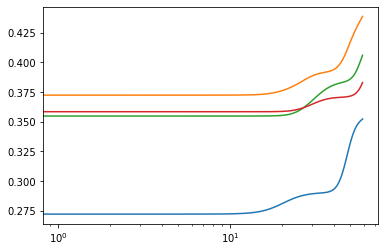

In [28]:
#Prediction with Ridge
losses0 = []
losses1 = []
losses2 = []
losses3 = []

space = np.logspace(-9,-1,60)
for lambda_ in space:
    w0, loss0 = ridge_regression(y0, tx0, lambda_)
    w1, loss1 = ridge_regression(y1, tx1, lambda_)
    w2, loss2 = ridge_regression(y2, tx2, lambda_)
    w3, loss3 = ridge_regression(y3, tx3, lambda_)
    losses0.append(loss0)
    losses1.append(loss1)
    losses2.append(loss2)
    losses3.append(loss3)
    #print("Lambda_ :{:7f} \n Losses : 1) {} \n 2) {} \n 3) {} \n 4) {}".format(lambda_,loss0,loss1,loss2,loss3))

print("Best lambda_0 : ",space[np.argmin(losses0)])
print("Best lambda_1 : ",space[np.argmin(losses1)])
print("Best lambda_2 : ",space[np.argmin(losses2)])
print("Best lambda_3 : ",space[np.argmin(losses3)])
plt.semilogx(losses0)
plt.semilogx(losses1)
plt.semilogx(losses2)
plt.semilogx(losses3)
#Getting the best ridge weights (so far on this naïve set without anything)
w0_opt, _ = ridge_regression(y0, tx0, space[np.argmin(losses0)])
w1_opt, _ = ridge_regression(y1, tx1, space[np.argmin(losses1)])
w2_opt, _ = ridge_regression(y2, tx2, space[np.argmin(losses2)])
w3_opt, _ = ridge_regression(y3, tx3, space[np.argmin(losses3)])

In [35]:
##### Testing with Regulog only biased input
initial_w = np.random.randn(31,1)
ylog0 = convert_label(y0)
ylog1 = convert_label(y1)
ylog2 = convert_label(y2)
ylog3 = convert_label(y3)
n_iters = 500
gamma = 1e-6
logspace = np.logspace(-9,-1,3)

loglosses0 = []
loglosses1 = []
loglosses2 = []
loglosses3 = []

for lambda_ in logspace:
    wlog0, logloss0, lossgraph0 = reg_logistic_regression(ylog0, tx0, lambda_, 
                                                          initial_w, n_iters, gamma)
    wlog1, logloss1, lossgraph1 = reg_logistic_regression(ylog1, tx1, lambda_, 
                                                          initial_w, n_iters, gamma)
    wlog2, logloss2, lossgraph2 = reg_logistic_regression(ylog2, tx2, lambda_, 
                                                          initial_w, n_iters, gamma)
    wlog3, logloss3, lossgraph3 = reg_logistic_regression(ylog2, tx2, lambda_, 
                                                          initial_w, n_iters, gamma)
    loglosses0.append(logloss0)
    loglosses1.append(logloss1)
    loglosses2.append(logloss2)
    loglosses3.append(logloss3)



In [44]:
wlog_opt0, _, lossgraph0 = reg_logistic_regression(ylog0,tx0,logspace[np.argmin(loglosses0)], initial_w,1500,3e-6)
wlog_opt1, _, lossgraph1 = reg_logistic_regression(ylog1,tx1,logspace[np.argmin(loglosses1)], initial_w,1500,3e-6)    
wlog_opt2, _, lossgraph2 = reg_logistic_regression(ylog2,tx2,logspace[np.argmin(loglosses2)], initial_w,1500,1e-5)    
wlog_opt3, _, lossgraph3 = reg_logistic_regression(ylog3,tx3,logspace[np.argmin(loglosses3)], initial_w,1500,1e-5)

Text(0.5, 1.0, 'lossgraph for cluster 3')

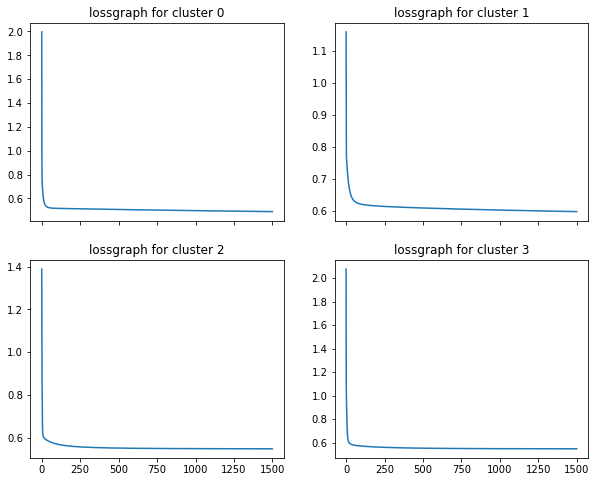

In [45]:
fig, axes = plt.subplots(2,2,figsize=(10,8),sharex =True)
ax = axes.ravel()
ax[0].plot(lossgraph0)
ax[1].plot(lossgraph1)
ax[2].plot(lossgraph2)
ax[3].plot(lossgraph3)
ax[0].set_title("lossgraph for cluster 0")
ax[1].set_title("lossgraph for cluster 1")
ax[2].set_title("lossgraph for cluster 2")
ax[3].set_title("lossgraph for cluster 3")

## Generate predictions and save ouput in csv format for submission:

In [50]:
#Getting test-data
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [55]:
test0, i0, test1, i1, test2, i2, test3, i3, =prijetnum_clustering(tX_test)
#Preprocessing + Bias
test0, _, _ = standardize(test0)
test1, _, _ = standardize(test1)
test2, _, _ = standardize(test2)
test3, _, _ = standardize(test3)
test0 = add_bias(test0)
test1 = add_bias(test1)
test2 = add_bias(test2)
test3 = add_bias(test3)

Using a test-set. 
 Returning clusterized dataset and squeezed indices. 

SHAPE (568238,)


In [58]:
#ridge prediction
ypredridge_0 = predict_labels(w0_opt,test0)
ypredridge_1 = predict_labels(w1_opt,test1)
ypredridge_2 = predict_labels(w2_opt,test2)
ypredridge_3 = predict_labels(w3_opt,test3)

ypred_ridge = np.ones(ids_test.shape[0])
ypred_ridge[i0]=ypredridge_0
ypred_ridge[i1]=ypredridge_1
ypred_ridge[i2]=ypredridge_2
ypred_ridge[i3]=ypredridge_3


In [69]:
np.squeeze(ypred_log0).shape

(227458,)

In [71]:
#Log prediction
ypred_log0 = predict_labels_log(wlog_opt0,test0)
ypred_log1 = predict_labels_log(wlog_opt1,test1)
ypred_log2 = predict_labels_log(wlog_opt2,test2)
ypred_log3 = predict_labels_log(wlog_opt3,test3)

ypred_log = np.ones(ids_test.shape[0])
ypred_log[i0]=ypred_log0
ypred_log[i1]=ypred_log1
ypred_log[i2]=ypred_log2
ypred_log[i3]=ypred_log3


In [74]:
OUTPUT_PATH = '../output/' # TODO: fill in desired name of output file for submission

create_csv_submission(ids_test, ypred_ridge, OUTPUT_PATH+"cluster_ridge.csv")
                      
create_csv_submission(ids_test, ypred_log, OUTPUT_PATH+"reguLogCluster.csv")